In [150]:
!pip install geopandas
!pip install shapely

In [ ]:
import numpy as np
import pandas as pd

### Import the Toronto Postal Code File (Genereted from the other notebook)

In [152]:
df=pd.read_csv('postalcode.csv')

In [153]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


### Transform the Text values to numeric

In [79]:
X = pd.get_dummies(df)

### Use Kmeans to Cluster the Toronto Neighbourhood into two clusters

In [80]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_kmeans = km.fit_predict(X)

In [ ]:
### Add the Cluster column in the DataFrame

In [156]:
df.insert(5, "Cluster", y_kmeans, True)

In [157]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster,Cluster
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,1,1
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,0,0
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1,1


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

### Filter Neighborhood that contains 'Mill', to make the plotting simple

In [138]:
mill_df=df[df["Neighborhood"].str.contains('Mill')]

### Create a Scatter Plot

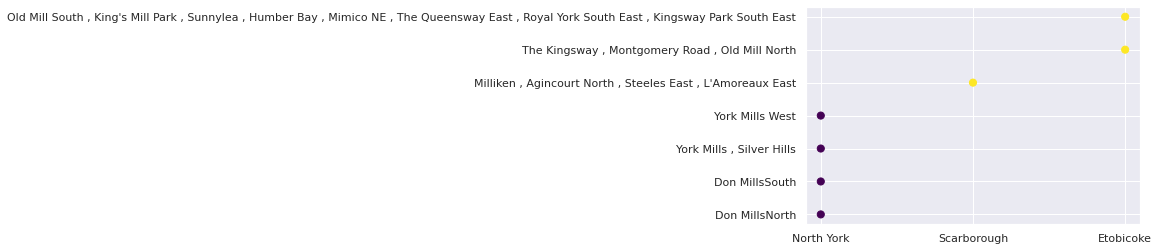

In [139]:
plt.scatter(mill_df["Borough"], mill_df["Neighborhood"], c=mill_df["Cluster"], s=50, cmap='viridis')

### Generate Geopandas for Toronto Map
### Used data from https://open.toronto.ca/dataset/neighbourhoods/

In [128]:
import geopandas
gp = geopandas.read_file('Neighbourhoods.zip')

In [140]:
mill_gp = geopandas.GeoDataFrame(
    mill_df, geometry=geopandas.points_from_xy(mill_df.Longitude, mill_df.Latitude))

In [141]:
mill_gp.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster,geometry
7,M3B,North York,Don MillsNorth,43.745906,-79.352188,0,POINT (-79.35219 43.74591)
13,M3C,North York,Don MillsSouth,43.725900,-79.340923,0,POINT (-79.34092 43.72590)
45,M2L,North York,"York Mills , Silver Hills",43.757490,-79.374714,0,POINT (-79.37471 43.75749)
64,M2P,North York,York Mills West,43.752758,-79.400049,0,POINT (-79.40005 43.75276)
83,M1V,Scarborough,"Milliken , Agincourt North , Steeles East , L'...",43.815252,-79.284577,1,POINT (-79.28458 43.81525)


### Plot the 'Mill' two clusters into the Toronto Map

<AxesSubplot:>

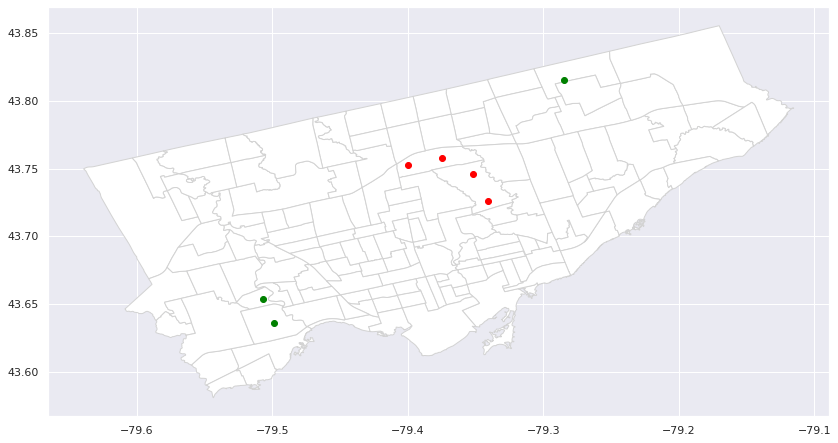

In [149]:
fig, ax = plt.subplots(figsize=(14,12))

gp.plot(ax=ax,facecolor='white',edgecolor='lightgray')

cluster_0=mill_gp[mill_gp.Cluster==0]
cluster_0.plot(ax=ax, color='red')

cluster_1=mill_gp[mill_gp.Cluster==1]
cluster_1.plot(ax=ax, color='green')